# Linear Regression

Linear regression model with multiple variables looks like this: 
\begin{align}
{a(x)} = {\left\langle w, x\right\rangle}.
  \end{align}

Linear regression model with one variable looks like this: 
\begin{align}
{a(x)} = {w_1x + w_0}.
  \end{align}

In order to find the optimal parameteres $w_i$ the gradient descent method will be used:
\begin{align}
w^t=w^{t-1} - \eta_t \nabla Q(w^{t-1}, X)
  \end{align}

The end of the iterations happens when:
\begin{align}
||w^t - w^{t-1} || < \varepsilon
  \end{align}

As for the cost function I will use the MSE:
\begin{align} 
Q(w, X)=\frac{1}{l}\sum_{i=1}^l (\left\langle w, x_i\right\rangle - y_i)^2 \rightarrow \mathop{min}_{w}
  \end{align}
\begin{align}
Q(w_0,w_1,X)=\frac{1}{l}\sum_{i=1}^l (w_1x_i + w_0 -y_i)^2
  \end{align}

Partial derivatives for one variable case to perform gradient descent:
\begin{align} 
\frac{\partial Q}{\partial w_0} = \frac{2}{l} \sum_{i=1}^l (w_1x_i + w_0 -y_i) ,\ \frac{\partial Q}{\partial w_1} = \frac{2}{l} \sum_{i=1}^l (w_1x_i + w_0 -y_i)x_i
  \end{align}

Matrix form of the cost function (multivariable case):
\begin{align}
Q(w, X)=\frac{1}{l} || Xw - y ||^2 \rightarrow \mathop{min}_{w}
  \end{align}

Matrix form of the gradient:
\begin{align}
\nabla_wQ(w, X)=\frac{2}{l} X^T(Xw - y)
  \end{align}

### Linear regression (one variable)

In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
data = pd.read_csv('ex1data1.csv', names=['X', 'y'], header=None)

In [167]:
X = data.copy()
X.insert(0, '1', 1)
y = X.pop('y')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


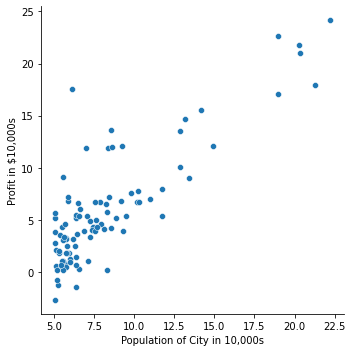

In [176]:
fig1 = sns.relplot(X['X'], y)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s');
plt.show(fig1)

In [148]:
def cost_function(X, y, w):
  return (1/X.shape[0]) * np.linalg.norm(X.dot(w) - y) ** 2

Gradient descent function:

In [245]:
def gradient_descent(X, y, w):
  L = X.shape[0]
  eps = 0.0001
  w_tmp = np.array([1, 1])
  grad_over_iter = []
  learning_rate = 0.01
  while np.linalg.norm(w_tmp - w) > eps:
    w_tmp = w
    w = w - learning_rate*2/L*np.transpose(X).dot(X.dot(w) - y)
    grad_over_iter.append(cost_function(X, y, w))
  return grad_over_iter, w


Stochastic gradient descent function:

In [ ]:
def stochastic_gd(X, y, w):
  pass

In [246]:
w = np.zeros((X.shape[1]))
X_np = X.copy()
y_np = y.copy()
X_np = X_np.to_numpy()
y_np = y_np.to_numpy()

In [247]:
plot_grad, w = gradient_descent(X_np, y_np, w)

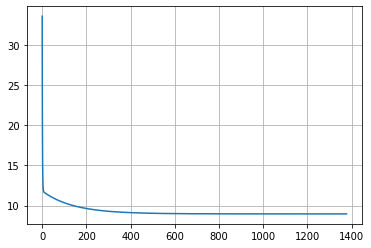

In [248]:
plt.plot(plot_grad)
plt.grid()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(9.924999999999997, 0.5, 'Profit in $10,000s')

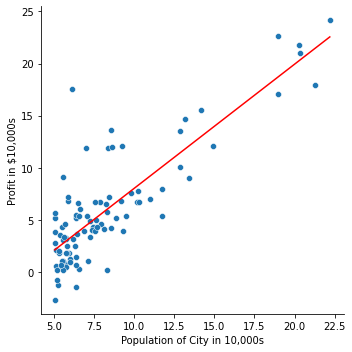

In [249]:
sns.relplot(X['X'], y)
sns.lineplot(X['X'], X.dot(w), color='red')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')